In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

Load data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


change column names to lower case and add hypen

In [3]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [4]:
data.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

## EDA
Look at the final_price variable. Does it have a long tail?

<Axes: >

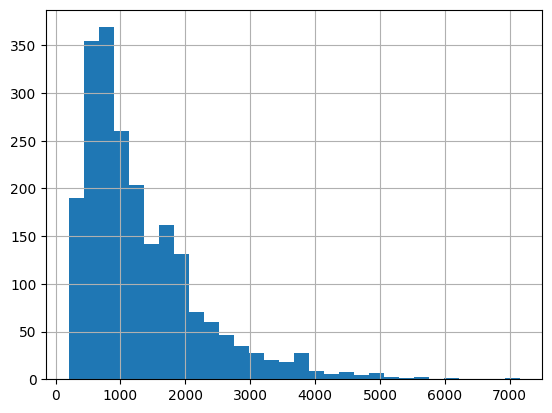

In [5]:
data['final_price'].hist(bins=30)

Answer: Somehow yes. it's a skewed data

### Q1
There's one column with missing values. What is it?

In [6]:
data.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

Answer: screen (as in the list)

### Q2
What's the median (50% percentile) for variable 'ram'?

In [7]:
float(data.ram.median())

16.0

### Q3 - 4

### Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42. \
Split your data in train/val/test sets, with 60%/20%/20% distribution. \
Use the same code as in the lectures

In [8]:
# get number of data and split it into 3 parts
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
# create a list of indices
idx = np.arange(n)
# shuffle the indices
np.random.seed(42)
np.random.shuffle(idx)
# split the data according to the shuffled indices
train_data = data.iloc[idx[:n_train]]
val_data = data.iloc[idx[n_train:n_train+n_val]]
test_data = data.iloc[idx[n_train+n_val:]]

In [9]:
train_data.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2079,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No,1123.29
668,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No,201.05
2073,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No,997.74
1113,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No,1016.00
788,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No,2739.00


## Q 3
We need to deal with missing values for the column from Q1. \
We have two options: fill it with 0 or with the mean of this variable. \
Try both options. For each, train a linear regression model without regularization using the code from the lessons.\
For computing the mean, use the training only!\
Use the validation dataset to evaluate the models and compare the RMSE of each option.\
Round the RMSE scores to 2 decimal digits using round(score, 2)\
Which option gives better RMSE?

In [10]:
data.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [11]:
data.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

In [12]:
data['screen'].unique()

array([15.6 , 17.3 , 14.  , 16.1 , 13.3 , 16.  , 13.6 , 17.  , 15.3 ,
       14.5 , 13.4 , 14.2 , 18.  , 14.1 , 12.4 , 13.5 , 16.2 , 15.  ,
       11.6 , 13.  , 10.5 , 14.4 ,   nan, 12.3 , 15.4 , 12.5 , 10.1 ,
       10.95, 12.  , 13.9 ])

In [13]:
features = ['ram', 'storage', 'screen']

In [14]:
X_train_data_zero = train_data[features].copy()
X_train_data_mean = train_data[features].copy()

X_val_data_zero = val_data[features].copy()
X_val_data_mean = val_data[features].copy()

X_test_data_zero = test_data[features].copy()
X_test_data_mean = test_data[features].copy()

In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) # add bias & intercept

    XTX = X.T.dot(X) # dot product
    XTX_inv = np.linalg.inv(XTX) # inverse matrix
    w_full = XTX_inv.dot(X.T).dot(y) # weights
    
    return w_full[0], w_full[1:]

In [16]:
# train the model with zero fill
w0_zero, w_zero = train_linear_regression(X_train_data_zero.fillna(0), train_data['final_price'])
# train the model with mean fill
w0_mean, w_mean = train_linear_regression(X_train_data_mean.fillna(X_train_data_mean.mean()), train_data['final_price'])

In [17]:
def rmse(y, y_pred):
    '''Root Mean Squared Error'''
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [18]:
y_pred_zero = w0_zero + X_val_data_zero.fillna(0).dot(w_zero)
y_pred_mean = w0_mean + X_val_data_mean.fillna(X_train_data_mean.mean()).dot(w_mean)

rmse_zero =round(rmse(y=val_data['final_price'], y_pred=y_pred_zero), 2)
rmse_mean = round(rmse(y=val_data['final_price'], y_pred=y_pred_mean), 2)

print(f'RMSE with zero fill: {rmse_zero}')
print(f'RMSE with mean fill: {rmse_mean}')

RMSE with zero fill: 597.36
RMSE with mean fill: 600.27


## Question 4
Now let's train a regularized linear regression. \
For this question, fill the NAs with 0. \
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100]. \
Use RMSE to evaluate the model on the validation dataset. \
Round the RMSE scores to 2 decimal digits. \
Which r gives the best RMSE? \
If there are multiple options, select the smallest r. \

In [19]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [21]:
X_train_data = train_data[features].copy().fillna(0)
X_val_data = val_data[features].copy().fillna(0)
X_test_data = test_data[features].copy().fillna(0)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train_data, train_data['final_price'], r=r)
    y_pred = w0 + X_val_data.dot(w)
    score = rmse(val_data['final_price'], y_pred)
    print(f'r={r} -> RMSE={score}')

r=0 -> RMSE=597.3635593619629
r=0.01 -> RMSE=597.361681985602
r=0.1 -> RMSE=597.3451592963625
r=1 -> RMSE=597.2121215589523
r=5 -> RMSE=597.0111186297032
r=10 -> RMSE=597.0587680661113
r=100 -> RMSE=597.9032640603043


## Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score. \
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]. \
For each seed, do the train/validation/test split with 60%/20%/20% distribution. \
Fill the missing values with 0 and train a model without regularization. \
For each seed, evaluate the model on the validation dataset and collect the RMSE scores. \
What's the standard deviation of all the scores? To compute the standard deviation, use np.std. \
Round the result to 3 decimal digits (round(std, 3))

In [22]:
def split_data(data, seed=42):
    # get number of data and split it into 3 parts
    n = len(data)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    # create a list of indices
    idx = np.arange(n)
    # shuffle the indices
    np.random.seed(seed=seed)
    np.random.shuffle(idx)
    # split the data according to the shuffled indices
    train_data = data.iloc[idx[:n_train]]
    val_data = data.iloc[idx[n_train:n_train+n_val]]
    test_data = data.iloc[idx[n_train+n_val:]]

    return train_data, val_data, test_data

In [26]:
def train_evaluate_model(data, features, seed=42):
    train_data, val_data, test_data = split_data(data, seed=seed)
    X_train_data = train_data[features].copy().fillna(0)
    X_val_data = val_data[features].copy().fillna(0)
    w0, w = train_linear_regression(X_train_data, train_data['final_price'])
    y_pred = w0 + X_val_data.dot(w)
    score = rmse(val_data['final_price'], y_pred)
    return score

In [29]:
rmse_scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    score = train_evaluate_model(data, features, seed=seed)
    rmse_scores.append(score)
    print(f'seed={seed} -> RMSE={score}')

seed=0 -> RMSE=564.4531204982359
seed=1 -> RMSE=636.7963145555948
seed=2 -> RMSE=588.9427355665042
seed=3 -> RMSE=597.6263651300563
seed=4 -> RMSE=571.3619449196478
seed=5 -> RMSE=572.3338944573832
seed=6 -> RMSE=647.210557822105
seed=7 -> RMSE=550.4065345309963
seed=8 -> RMSE=585.5664568915514
seed=9 -> RMSE=575.8781445271151


In [30]:
np.std(rmse_scores)

np.float64(29.34651297271632)

## Question 6
Split the dataset like previously, use seed 9. \
Combine train and validation datasets. \
Fill the missing values with 0 and train a model with r=0.001. \
What's the RMSE on the test dataset?

In [31]:
train_data, val_data, test_data = split_data(data, seed=9)
merged_data = pd.concat([train_data, val_data])
X_merged_data = merged_data[features].copy().fillna(0)

w0, w = train_linear_regression(X_merged_data, merged_data['final_price'])
X_test_data = test_data[features].copy().fillna(0)
y_pred = w0 + X_test_data.dot(w)
score = rmse(test_data['final_price'], y_pred)
print(f'RMSE on test data: {score}')

RMSE on test data: 608.6102791248078
